In [23]:
%load_ext autoreload
%autoreload 2
from model import *
from neurons import *
from synaptics import *
from utils import *
from protocols import *
from pyvis.network import Network
res = .1
plt.style.use(['dark_background'])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
snn = SNNModel()
snn.generate_model('config.txt')

(0, 2) 0.42846890826135864
(0, 3) 0.46215429697512234
(0, 4) 0.9008474858870407
(0, 5) 0.504800469285447
(0, 6) 0.8640758975891065
(0, 7) 0.6866255751294531
(0, 8) 0.4224201446365906
(0, 9) 0.4817797026926377
(0, 10) 0.5899146103508697
(0, 11) 0.44138793478805705
(1, 2) 0.7556716859722568
(1, 3) 0.6584065023965856
(1, 4) 0.32233762245015607
(1, 5) 0.6364115574616558
(1, 6) 0.0683131920209058
(1, 7) 0.05860889081348397
(1, 8) 0.1412273749976226
(1, 9) 0.14934841137882693
(1, 10) 0.46017763792982846
(1, 11) 0.21538543217878225
(2, 8) 0.36795238398452146
(2, 3) 0.46360804871549843
(2, 4) 0.2762633732121995
(2, 11) 0.8015571951152277
(2, 6) 0.705282778967227
(2, 10) 0.8861376390197085
(2, 7) 0.38970237015873754
(2, 5) 0.4379986490340996
(3, 11) 0.23044194674446805
(3, 10) 0.9823795778770044
(3, 5) 0.6687269706228866
(3, 9) 0.25662504289361343
(3, 4) 0.41243927836220073
(3, 2) 0.954596642291556
(3, 8) 0.2669270242421513
(3, 7) 0.02194786231040846
(4, 11) 0.9173017678253583
(4, 10) 0.8209077

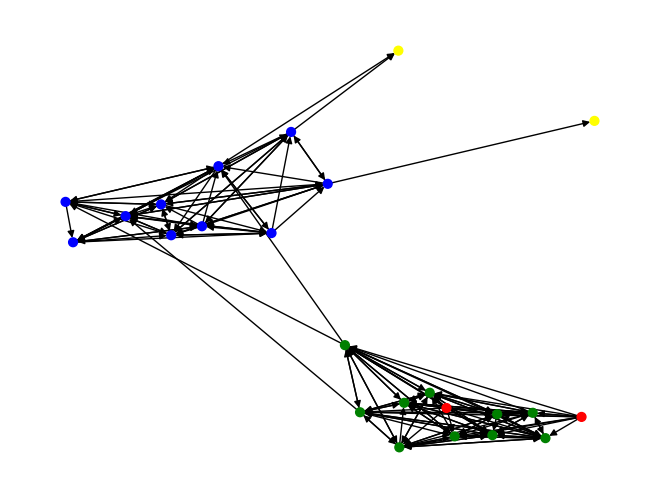

In [29]:
nx.draw(snn.graph, node_color=snn.color_map, node_size=40)
labels = nx.get_edge_attributes(snn.graph, 'weight')
pos = nx.get_node_attributes(snn.graph, 'pos')
#nx.draw_networkx_edge_labels(snn.graph, pos, edge_labels=labels)

In [11]:
snn.graph.remove_edges_from(nx.selfloop_edges(snn.graph))
print(nx.selfloop_edges(snn.graph))

<generator object selfloop_edges.<locals>.<genexpr> at 0x0000019B93F00660>


In [7]:
net = Network('500px', '500px')
net.from_nx(snn.get_graph())
net.show('nx.html')

AssertionError: 

In [69]:
snn.show_config()

{'Layers of neurons': {'L0': [<neurons.Spikes_at_will at 0x222026fc050>,
  'L1': [<neurons.Izhikevich at 0x222026de510>,
  'L2': [<neurons.Izhikevich at 0x222026c5690>,
  'L3': [<neurons.Izhikevich at 0x222026e7d50>,
   <neurons.Izhikevich at 0x222026e5750>]},
 'synapses': {(0, 2): <synaptics.Synapse at 0x222026e7490>,
  (0, 3): <synaptics.Synapse at 0x222026e5250>,
  (0, 4): <synaptics.Synapse at 0x222026e7650>,
  (0, 5): <synaptics.Synapse at 0x222026e6210>,
  (0, 6): <synaptics.Synapse at 0x222026e4910>,
  (0, 7): <synaptics.Synapse at 0x222026e7050>,
  (0, 8): <synaptics.Synapse at 0x222026e6d50>,
  (0, 9): <synaptics.Synapse at 0x222026e5a90>,
  (0, 10): <synaptics.Synapse at 0x222026e5a50>,
  (0, 11): <synaptics.Synapse at 0x222026e4c50>,
  (0, 12): <synaptics.Synapse at 0x222026e6510>,
  (0, 13): <synaptics.Synapse at 0x222026e75d0>,
  (0, 14): <synaptics.Synapse at 0x222026e5310>,
  (0, 15): <synaptics.Synapse at 0x222026e6c50>,
  (1, 2): <synaptics.Synapse at 0x222026e5b50>,
 

In [22]:
a = read_config("config.txt")
a

{'Neurons': {'L0': {'Type': 'Spikes_at_will',
   'Number': 2,
   'I': [3, 10],
   'Preset': 'None'},
  'L1': {'Type': 'Izhikevich', 'Number': 4, 'I': 0, 'Preset': 'RS'},
  'L2': {'Type': 'Izhikevich', 'Number': 4, 'I': 0, 'Preset': 'RS'},
  'L3': {'Type': 'Izhikevich', 'Number': 2, 'I': 0, 'Preset': 'RS'}},
 'Synapses': {'L0 L1': {'Connection_type': 'FC',
   'Synapse_type': 'Vanilla',
   'Between_layers': 'L0 L1',
   'Prob': 0.2},
  'L1': {'Connection_type': 'gnm',
   'Synapse_type': 'Vanilla',
   'Between_layers': 'False',
   'Prob': 0.2}}}

In [6]:
test = '123 123'
test.split(' ')

['123', '123']

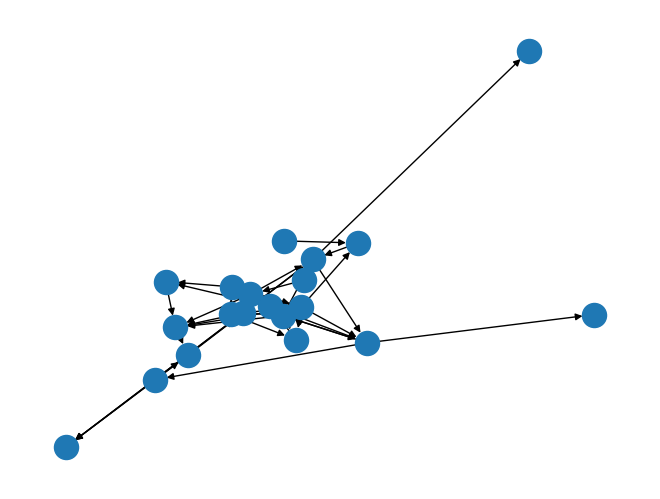

In [91]:
test = nx.gnp_random_graph(0, .1, seed=None, directed=True)
nx.draw(test)

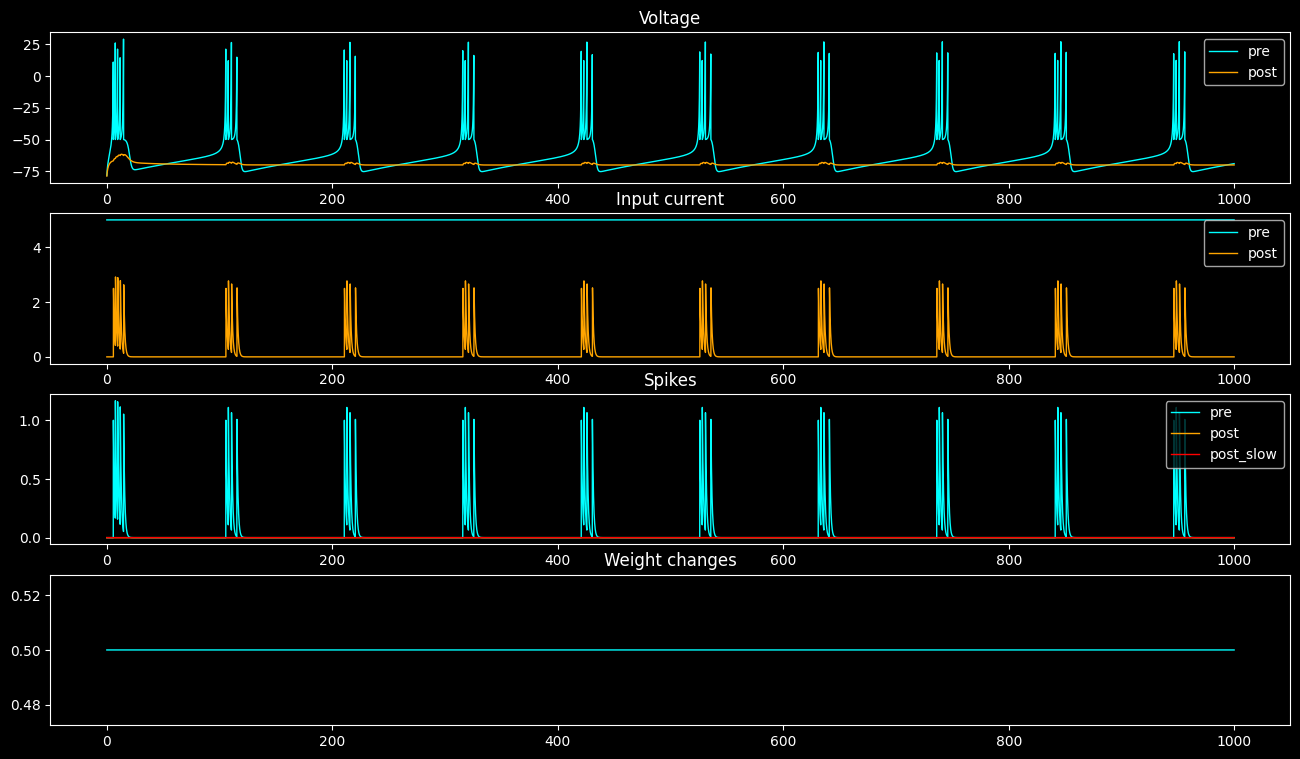

In [19]:
pre_neu = Izhikevich(I=5, preset='CH', resolution=res, noise=0, tau=10)
post_neu = Izhikevich(preset='RS', resolution=res, noise=0, tau=10)
syn = Synapse(pre_neu, post_neu, slow_tau=100, lr=.1, scale=5)
syn.set_weight_manually(0.5)
time = 1000
short_single_synapse(pre_neu, post_neu, syn, time, rule='t_stdp_forgetting')

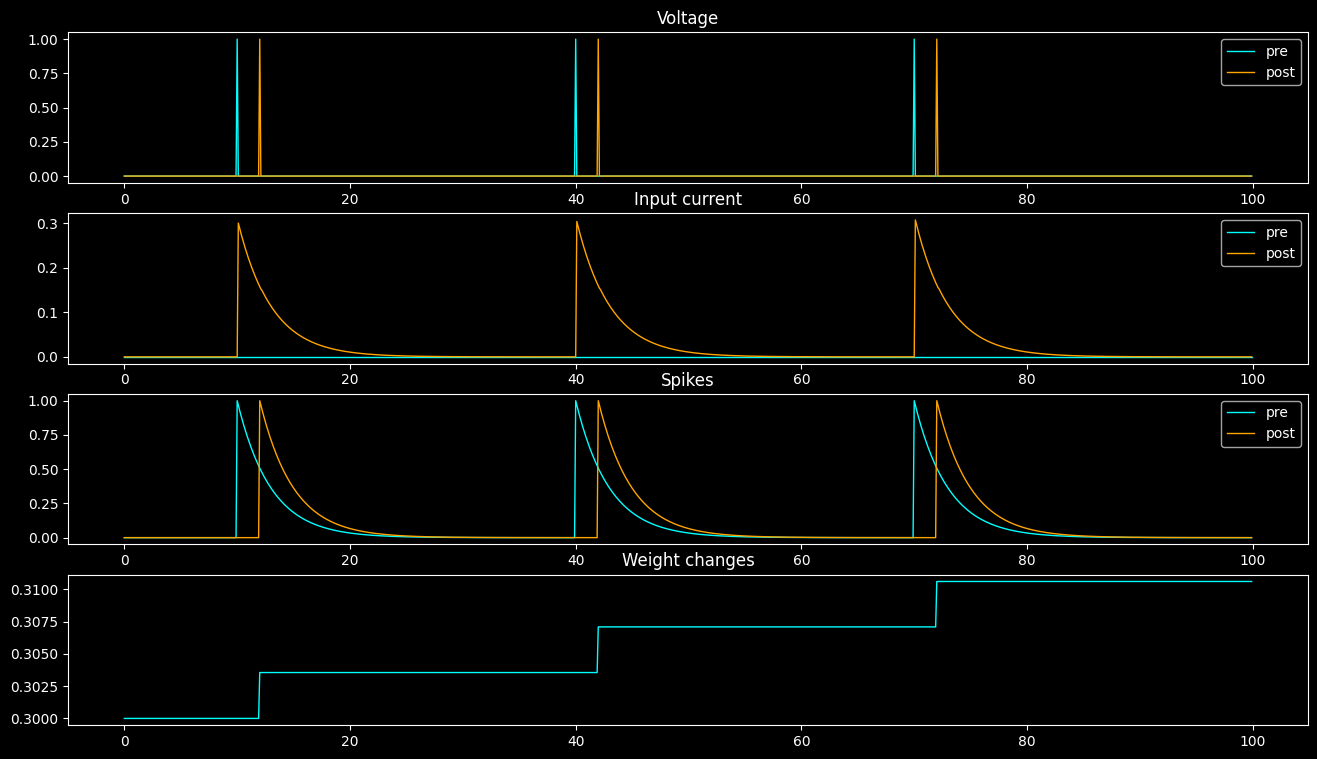

In [8]:
pre_neu = Spikes_at_will(awaiting_time=10, refresh_time=30)
post_neu = Spikes_at_will(awaiting_time=12, refresh_time=30)
syn = Synapse(pre_neu, post_neu, slow_tau=100, lr=.5, scale=1)
syn.set_weight_manually(weight=.3)
time = 100
short_single_synapse(pre_neu, post_neu, syn, time, rule='pair_stdp')

In [ ]:
pre_neu = Probability_neuron(I=.01, tau=10)
post_neu = Probability_neuron(tau=10)
syn = Synapse(pre_neu, post_neu, slow_tau=100, lr=.1, scale=.01)
syn.set_weight_manually(0.5)
time = 100
short_single_synapse(pre_neu, post_neu, syn, time, rule='t_stdp')

In [ ]:
neu = Probability_neuron(I=.01)
time = 100
t = np.arange(int(time / res)) * res
sps = []
for i in range(int(time / res)):
    sps.append(neu.dynamics())

In [ ]:
neu.apply_current(-100)
neu.dynamics()
sps1 = []
vs1 = []
for i in range(int(time / res)):
    sps1.append(neu.dynamics())
    vs1.append(neu.v)
    if i == int(0 / res):
        neu.apply_current(.1506)
plt.plot(t, vs1)

In [ ]:
neu.apply_current(0)
neu.dynamics()
sps1 = []
vs1 = []
for i in range(int(time / res)):
    sps1.append(neu.dynamics())
    vs1.append(neu.v)
plt.plot(t, vs1)

In [ ]:
def dev_test(neuron, time, timings, currents, default_current=0):
    t = np.arange(int(time / neuron.resolution)) * neuron.resolution
    vs = []
    spikes = []
    Is = []
    var_idx = 0
    for step in range(len(t)):
        #neuron.apply_current(default_current)
        if len(timings) > var_idx:
            if step == int(timings[var_idx] / neuron.resolution):
                neuron.apply_current(currents[var_idx])
                var_idx += 1
        spikes.append(neuron.dynamics())
        Is.append(neuron.I)
        vs.append(neuron.v)
        
    return vs, Is, spikes,t 

In [ ]:
time = 200
timings = [50, 51, 52]
currents = [0, 100, 0]
neu1 = Izhikevich(I=0, preset='RZ', resolution=res)
vs, Is, spikes, t = dev_test(neu1, time, timings, currents, default_current=0)

In [ ]:
def show_stats(vs, Is, spikes, t, fwidth=15, fheight=9):
    figure, axis = plt.subplots(3, 1)
    figure.set_figwidth(fwidth)
    figure.set_figheight(fheight)
    voltage = axis[0]
    cur = axis[1]
    spks = axis[2]
    voltage.plot(t, vs)
    voltage.set_title('Voltage')
    cur.plot(t, Is)
    cur.set_title('Input current')
    spks.plot(t, spikes)
    spks.set_title('Spikes')

In [ ]:
show_stats(vs, Is, spikes, t)

In [ ]:
def dev_two(pre, post, time, ap_scale=1):
    t = np.arange(int(time / pre.resolution)) * pre.resolution
    vs_pre = []
    spikes_pre = []
    Is_pre = []
    vs_post = []
    spikes_post = []
    Is_post = []
    var_idx = 0
    for step in range(len(t)):
        #neuron.apply_current(default_current)
        ap = pre.dynamics()
        spikes_pre.append(ap)
        Is_pre.append(pre.I)
        vs_pre.append(pre.v)
        post.apply_current(ap * ap_scale)
        spikes_post.append(post.dynamics())
        Is_post.append(post.I)
        vs_post.append(post.v)
        
    return vs_pre, Is_pre, spikes_pre, vs_post, Is_post, spikes_post, t

In [ ]:
res = .1
time = 500
neu_pre = Izhikevich(I=4, preset='CH', resolution=res)
neu_post = Izhikevich(I=0, preset='RZ', resolution=res)
neu_post.u = 0
vs_pre, Is_pre, spikes_pre, vs_post, Is_post, spikes_post, t = dev_two(neu_pre, neu_post, time=time, ap_scale=-100)

In [ ]:
show_stats(vs_pre, Is_pre, spikes_pre, t)

In [ ]:
show_stats(vs_post, Is_post, spikes_post, t)

In [ ]:
def simulate_single(neu, time, ap_scale=1):
    t = np.arange(int(time / neu.resolution)) * neu.resolution
    vs = []
    spikes = []
    Is = []
    for step in range(len(t)):
        ap = neu.dynamics()
        spikes.append(ap * ap_scale)
        Is.append(neu.I)
        vs.append(neu.v)
        
    return vs, Is, spikes, t

In [ ]:
def simulate_several(pre, post, time, ap_scale=[1]):
    t = np.arange(int(time / post.resolution)) * post.resolution
    vs_pre = []
    spikes_pre = []
    Is_pre = []
    vs_post = []
    spikes_post = []
    Is_post = []
    var_idx = 0
    for neus in range(len(pre)):
        vs = []
        spikes = []
        Is = []
        for step in range(len(t)):
            #neuron.apply_current(default_current)
            ap = pre[neus].dynamics()
            spikes.append(ap)
            Is.append(pre[neus].I)
            vs.append(pre[neus].v)
        spikes_pre.append(spikes)
        Is_pre.append(Is)
        vs_pre.append(vs)

    aps = np.array(spikes_pre)
    aps = aps.sum(0)
    print(aps.shape)
    for step in range(len(t)):
        post.apply_current(aps[step] * ap_scale)
        spikes_post.append(post.dynamics())
        Is_post.append(post.I)
        vs_post.append(post.v)
        
    return vs_pre, Is_pre, spikes_pre, vs_post, Is_post, spikes_post, t

In [ ]:
def show_stats_many(vs, Is, spikes, t, fwidth=15, fheight=9):
    figure, axis = plt.subplots(3, 1)
    figure.set_figwidth(fwidth)
    figure.set_figheight(fheight)
    for i in range(len(vs)):
        voltage = axis[0]
        cur = axis[1]
        spks = axis[2]
        voltage.plot(t, vs[i])
        cur.plot(t, Is[i])
        spks.plot(t, spikes[i])
    voltage.set_title('Voltage')
    cur.set_title('Input current')
    spks.set_title('Spikes')

In [ ]:
res = .1
time = 1000
neu0 = Izhikevich(I=4, preset='RS', resolution=res)
neu1 = Izhikevich(I=5, preset='RS', resolution=res)
neu2 = Izhikevich(I=6, preset='RS', resolution=res)
neu3 = Izhikevich(I=7, preset='CH', resolution=res)
neu_post = Izhikevich(I=0, preset='RZ', resolution=res)
neus = [neu0, neu1, neu2, neu3]
vs_pre, Is_pre, spikes_pre, vs_post, Is_post, spikes_post, t = simulate_several(neus, neu_post, time=time, ap_scale=-100)

In [ ]:
show_stats_many(vs_pre, Is_pre, spikes_pre, t)

In [ ]:
show_stats(vs_post, Is_post, spikes_post, t)

In [ ]:
# BCM

class BCM:
    def __init__(self, neu1, neu2, k=.1):
        self.w = 0
        self.neu1 = neu1
        self.neu2 = neu2
        self.k = k
        self.theta = neu2

    def change(self):
        dw = self.neu2 * (self.neu2 - self.theta) * self.neu1 -self.k * self.ww